# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 2 Data

In [2]:
df= pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## 2.1 Brief Explanation of the Data:

Field Descriptions:

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

pelvic incidence
pelvic tilt
lumbar lordosis angle
sacral slope
pelvic radius
grade of spondylolisthesis


# 3. EDA 

In [3]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.shape

(200, 6)

In [6]:
print("Columns:")
print(df.columns)

Columns:
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [7]:
print("Unique Values:")
print(df.nunique())

Unique Values:
Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64


# 3.1 Categorical Data Distribution

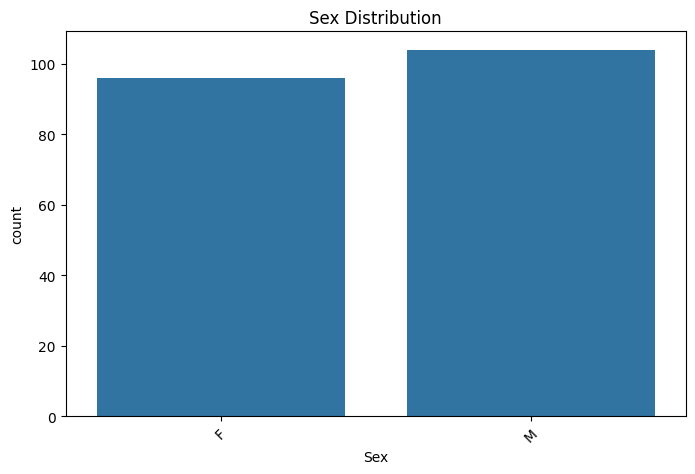

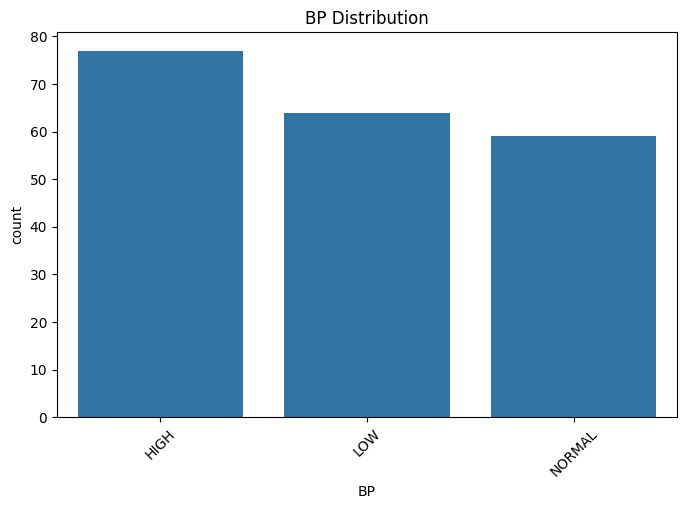

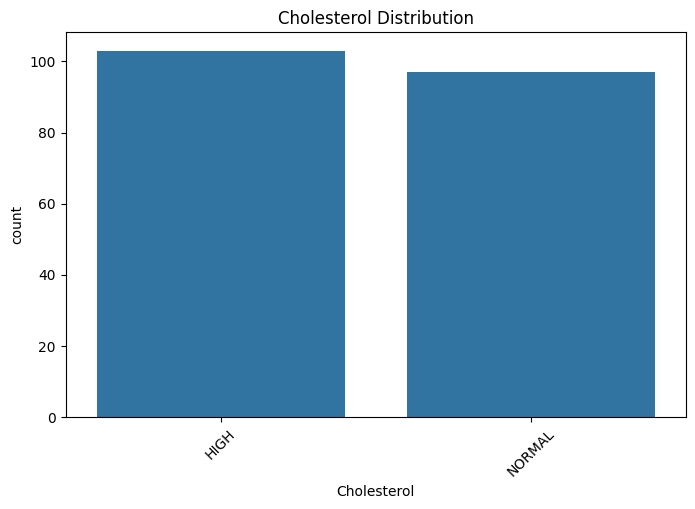

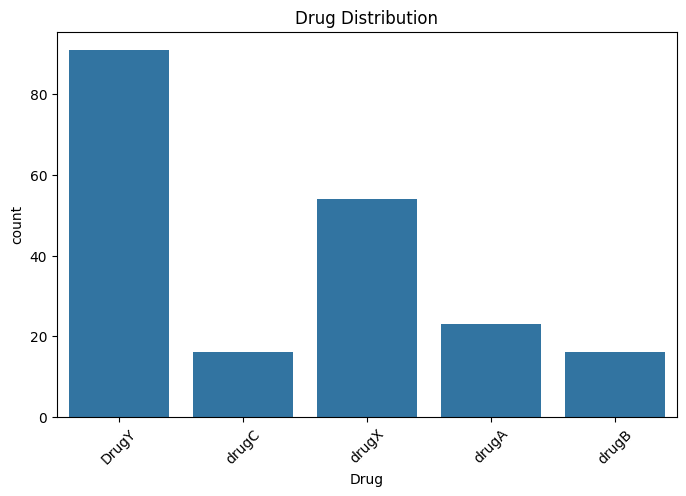

In [8]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [10]:
original_class_labels = le.classes_
original_class_labels

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [11]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


# 3.2 Data plots

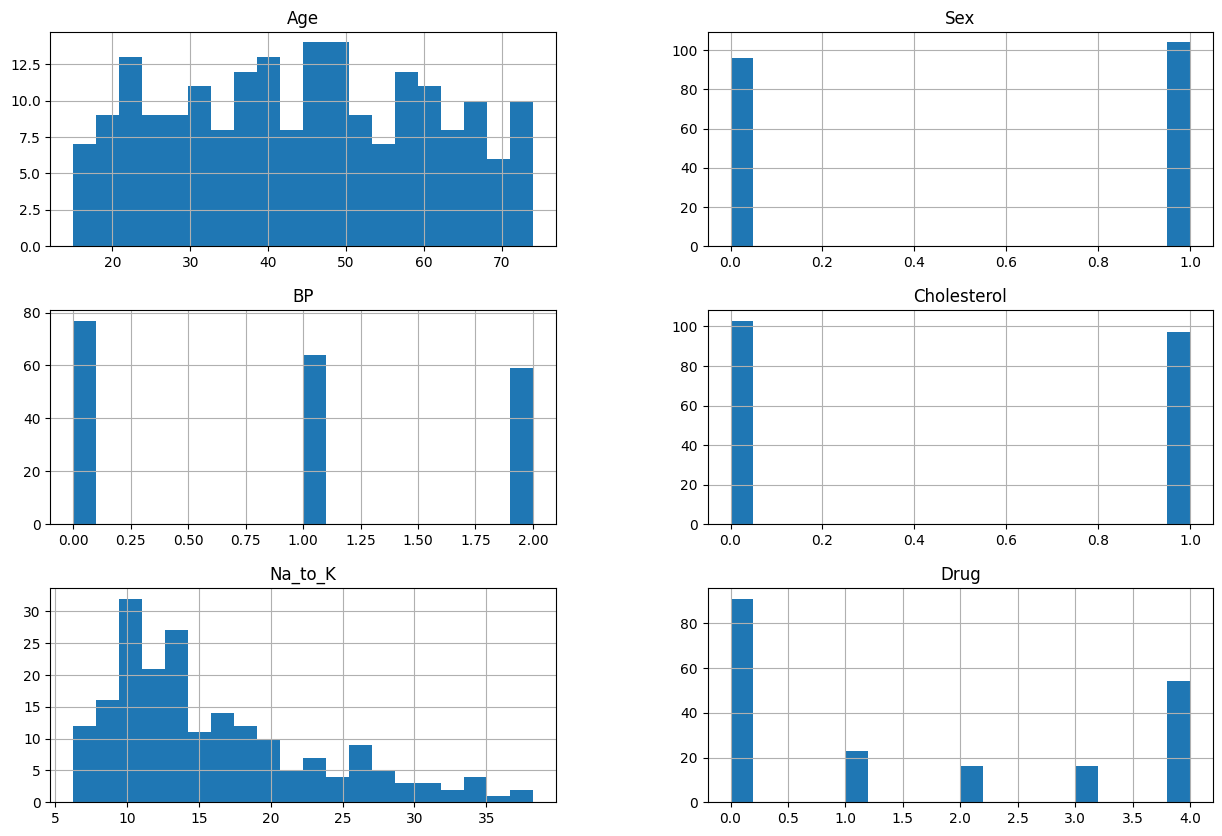

In [12]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()


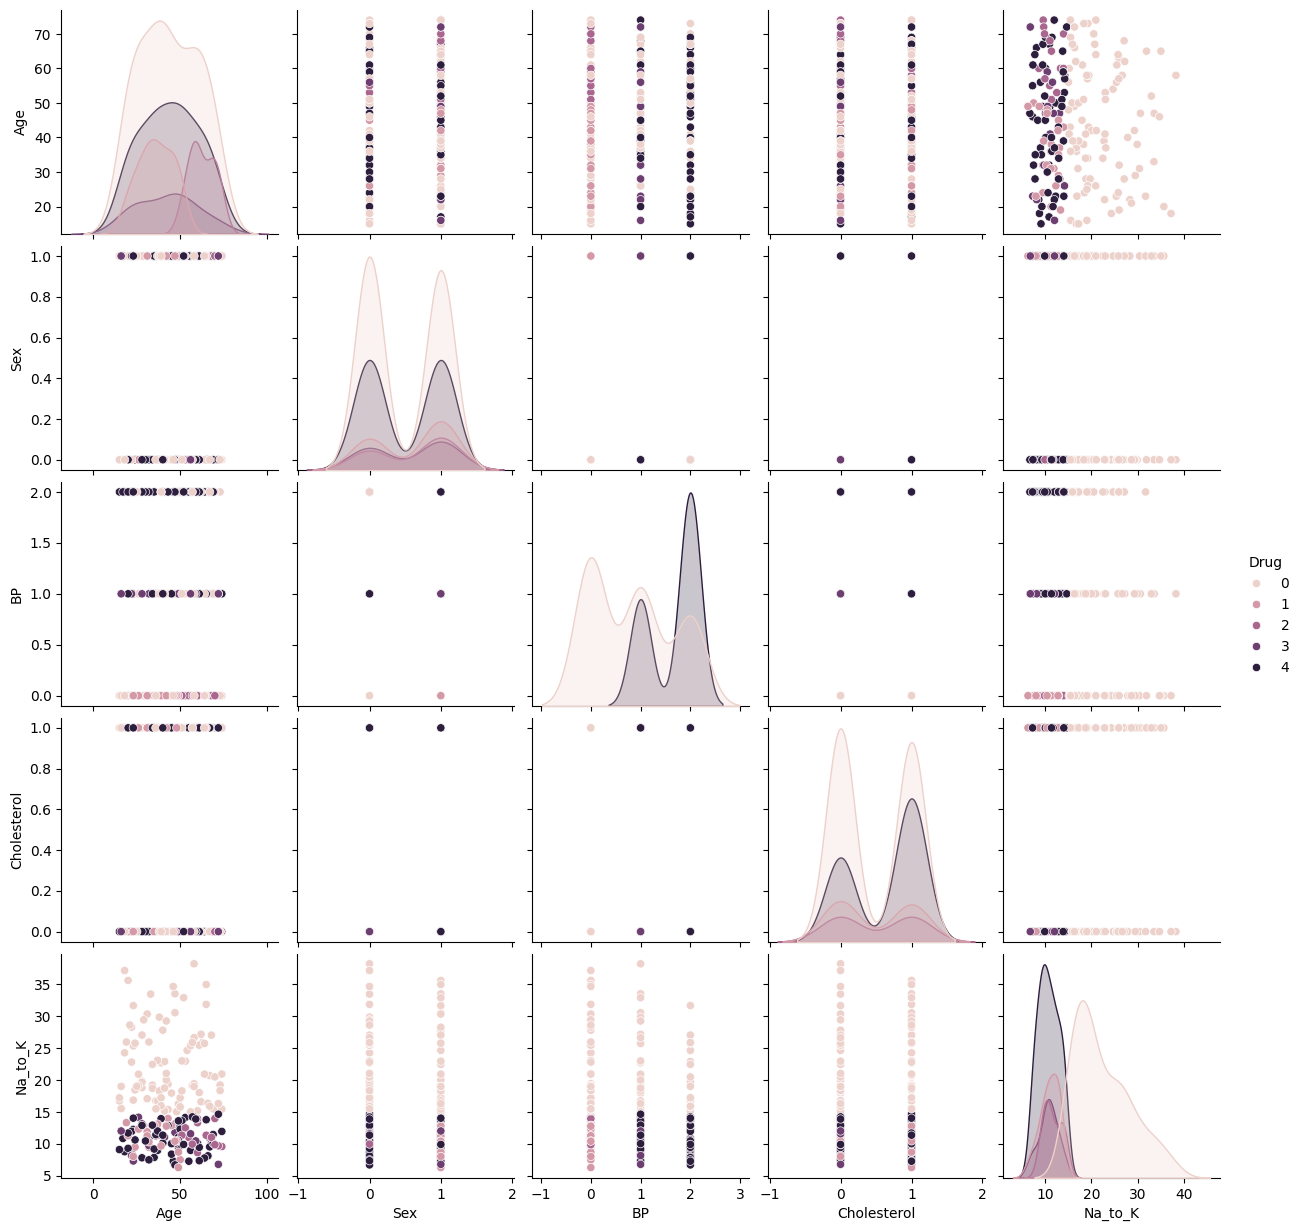

In [13]:
import seaborn as sns

sns.pairplot(df, hue="Drug")
plt.show()


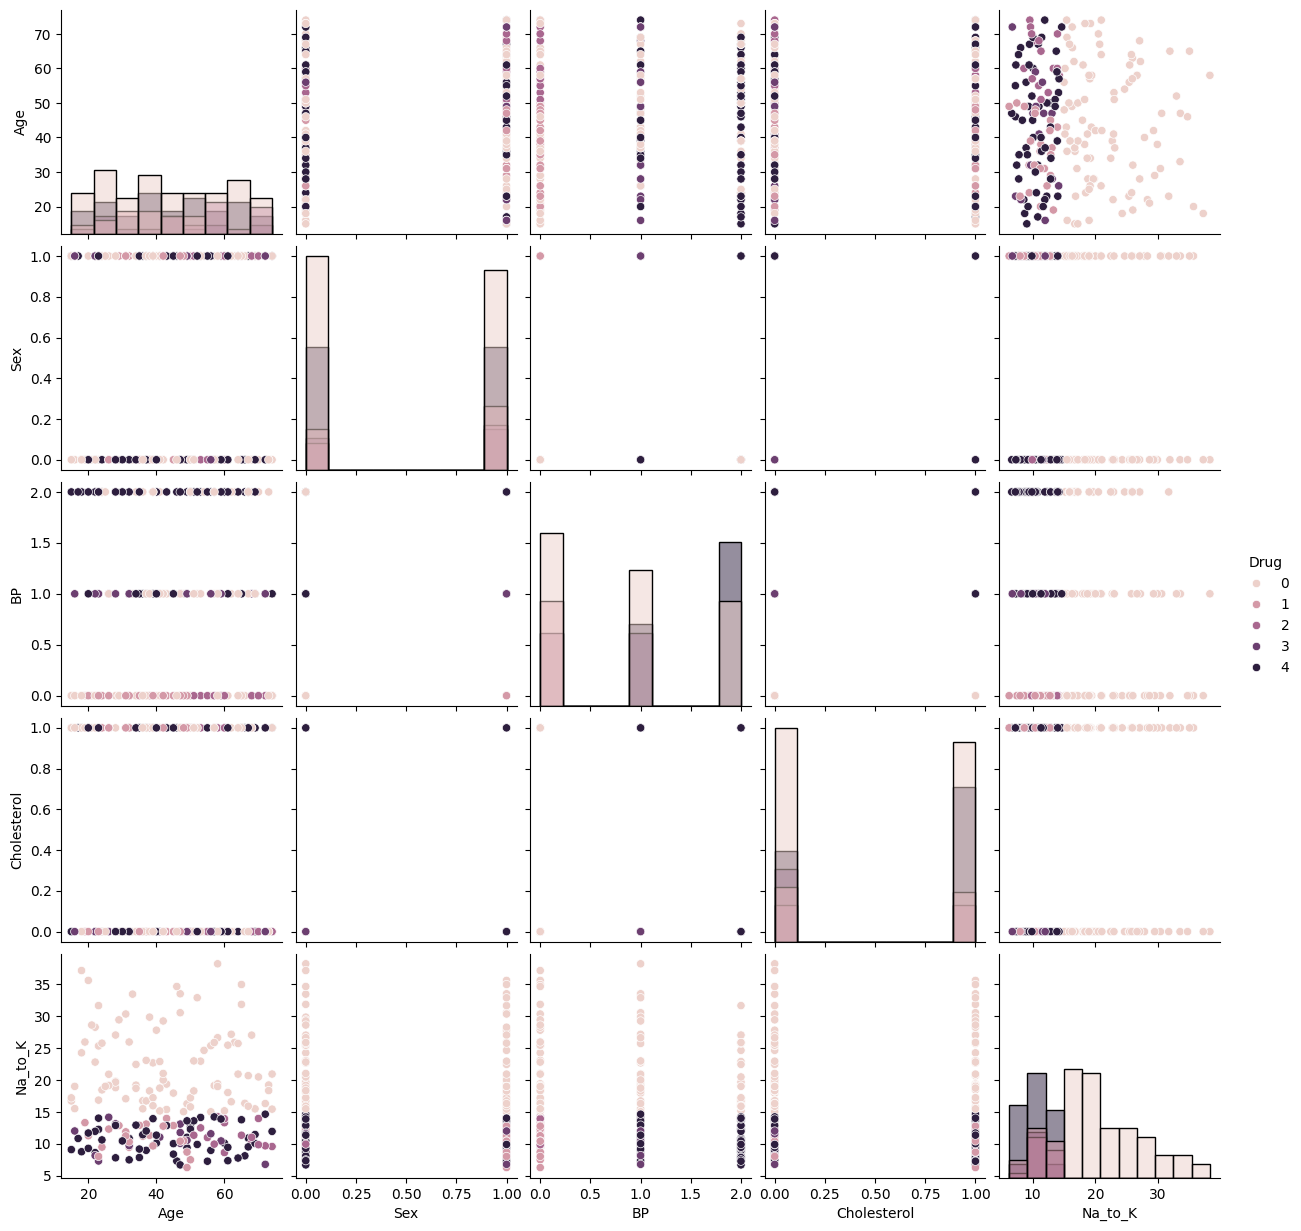

In [14]:
import seaborn as sns

sns.pairplot(df, hue="Drug",diag_kind="hist")
plt.show()


# 3.3. Correlation Analysis

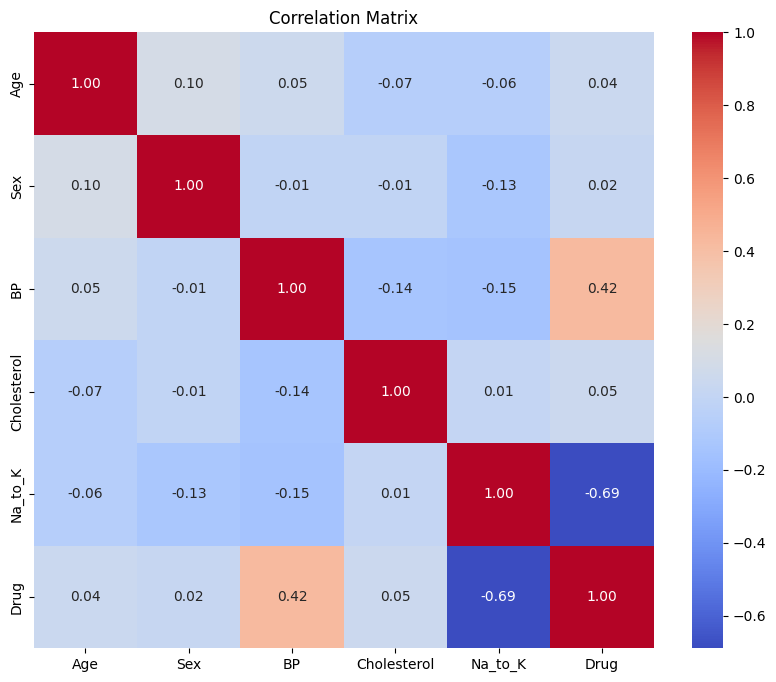

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


# 4.Data Splitting

In [17]:
x = df.drop(['Drug'], axis=1)
y = df['Drug']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 5. Basic Data Visualization

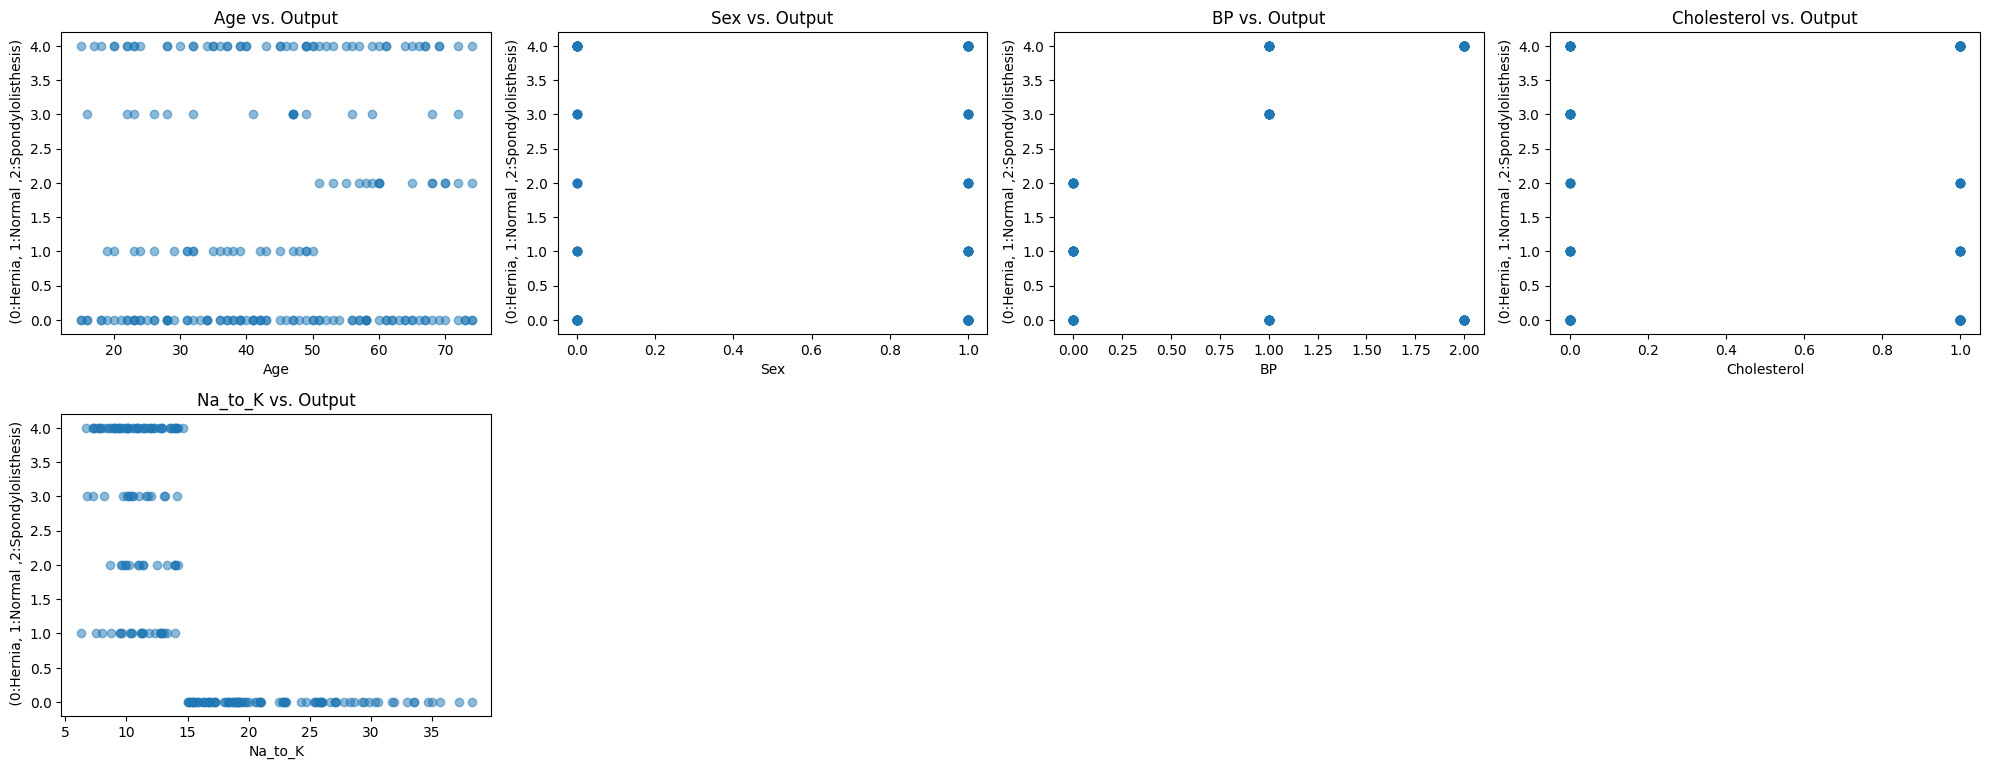

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))

for i, column in enumerate(x.columns):
    plt.subplot(4, 4, i + 1)  # Assuming 4x4 grid, adjust as needed
    plt.scatter(x[column], df['Drug'], alpha=0.5)
    plt.title(f'{column} vs. Output')
    plt.xlabel(column)
    plt.ylabel(' (0:Hernia, 1:Normal ,2:Spondylolisthesis)')
plt.tight_layout()
plt.show()

# 6. StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 7. KNN Model Training and Evaluation

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("k-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Confusion Matrix:\n", confusion_knn)
print("Classification Report:\n", classification_rep_knn)


k-Nearest Neighbors (KNN) Model:
Accuracy: 0.88
Confusion Matrix:
 [[13  1  0  0  1]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  3  1]
 [ 1  0  0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      0.60      0.75         5
           4       0.83      0.91      0.87        11

    accuracy                           0.88        40
   macro avg       0.91      0.88      0.88        40
weighted avg       0.88      0.88      0.87        40



# 8. Saving The Model

In [22]:
import joblib
joblib.dump(knn_model, 'KNN.pkl')

['KNN.pkl']